In [1]:
#Merging DataFrames in Pandas

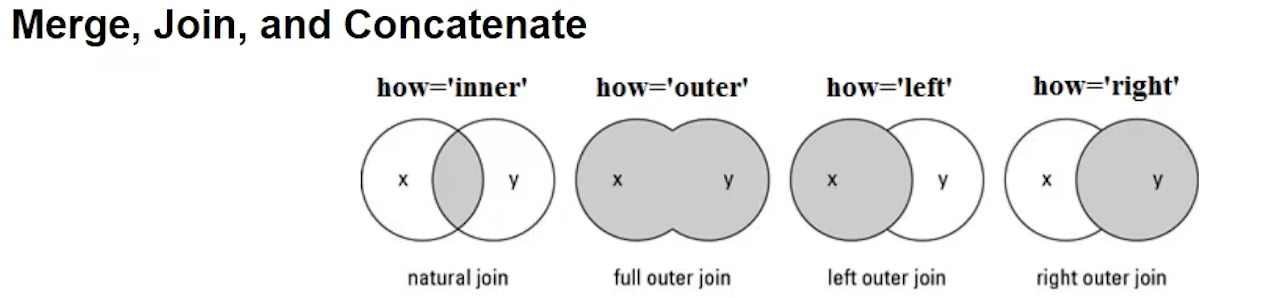

In [4]:
#In the above image, only the shaded part is returned

In [6]:
import pandas as pd

In [10]:
df1 = pd.read_csv(r"E:\Videos\LOTR.csv")

In [12]:
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [16]:
df2 = pd.read_csv(r"E:\Videos\LOTR 2.csv")

In [18]:
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [20]:
#Here we have 2 dataframes df1 and df2
#Difference between the two dataframes is that there are some common fellowshipID(1001 and 1002) and both have fellowshipID and FirstName column common

In [26]:
#Let's use merge first
#Merge is just like the joints we just looked in the image above (outer, inner, left and right)
df1.merge(df2) #Here df1 will be left dataframe and df2 will be right dataframe, an since we didn't specify, by default it will be an inner joint(only the common between the dataframes)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [30]:
df1.merge(df2, how = 'inner', on = 'FellowshipID') #only merged the FellowshipID column and test are separated by left dataframe(x) and right dataframe(y). Hence even though they have common parameters(FirstName) the merge operation was not performed on them, therefore separated.

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


In [32]:
df1.merge(df2, how = 'inner', on = ['FellowshipID', 'FirstName'])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [40]:
#Outer joint
df1.merge(df2, how = 'outer') #inner gives only the values that are the same, but outer gives all the values regardless if they are same

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [38]:
#Left joint
df1.merge(df2, how = 'left') #Take everything from df1, the and all the overlapped from df2

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [42]:
#right joint
df1.merge(df2, how = 'right') #Take everything from df2, the and all the overlapped from df1

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [44]:
#cross joint
df1.merge(df2, how = 'cross') #it takes each value from left dataframe (df1) and compares to each value in right dataframe(df2)

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


In [52]:
#joins
df1.join(df2, on = 'FellowshipID', how = 'outer', lsuffix = '_Left', rsuffix = '_Right')

,FellowshipID,FellowshipID_Left,FirstName_Left,Skills,FellowshipID_Right,FirstName_Right,Age
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN


In [54]:
df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_Left', rsuffix = '_Right')

In [56]:
df4

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN


In [60]:
#Concatenate
pd.concat([df1, df2])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [62]:
pd.concat([df1, df2], join = 'inner')

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1001,Frodo
1,1002,Samwise
2,1006,Legolas
3,1007,Elrond
4,1008,Barromir


In [64]:
pd.concat([df1, df2], join = 'outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [66]:
pd.concat([df1, df2], join = 'outer', axis = 1)

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001.0,Frodo,Hiding,1001,Frodo,50
1,1002.0,Samwise,Gardening,1002,Samwise,39
2,1003.0,Gandalf,Spells,1006,Legolas,2931
3,1004.0,Pippin,Fireworks,1007,Elrond,6520
4,NaN,NaN,NaN,1008,Barromir,51


In [70]:
pd.concat([df1, df2], join = 'outer', axis = 0)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0
